# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | badger
Processing Record 2 of Set 1 | kingston
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | korla
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | taro
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | constantia
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | thompson
Processing Record 12 of Set 1 | vernon
Processing Record 13 of Set 1 | alenquer
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | sola
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | east london
Processing Record 18 of Set 1 | nyurba
Processing Record 19 of Set 1 | kodiak
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | bethel
Processing Record 22 of Set 1 | la passe
Processing Record 

Processing Record 42 of Set 4 | portland
Processing Record 43 of Set 4 | sievi
Processing Record 44 of Set 4 | karratha
Processing Record 45 of Set 4 | mount pearl
Processing Record 46 of Set 4 | greenville
Processing Record 47 of Set 4 | alice town
Processing Record 48 of Set 4 | haiku-pauwela
Processing Record 49 of Set 4 | lycksele
Processing Record 0 of Set 5 | ust-nera
Processing Record 1 of Set 5 | alice springs
Processing Record 2 of Set 5 | remire-montjoly
Processing Record 3 of Set 5 | tual
Processing Record 4 of Set 5 | tumbes
Processing Record 5 of Set 5 | sorong
Processing Record 6 of Set 5 | mil'kovo
Processing Record 7 of Set 5 | invercargill
Processing Record 8 of Set 5 | benjamin hill
Processing Record 9 of Set 5 | anadyr
Processing Record 10 of Set 5 | tolanaro
Processing Record 11 of Set 5 | ji'an
Processing Record 12 of Set 5 | vila velha
Processing Record 13 of Set 5 | mount gambier
Processing Record 14 of Set 5 | tranovaho
City not found. Skipping...
Processing Rec

Processing Record 36 of Set 8 | belyayevka
Processing Record 37 of Set 8 | saint-joseph
Processing Record 38 of Set 8 | bardai
Processing Record 39 of Set 8 | suwayr
Processing Record 40 of Set 8 | lagos
Processing Record 41 of Set 8 | dwarka
Processing Record 42 of Set 8 | pervomayskoye
Processing Record 43 of Set 8 | avarua
Processing Record 44 of Set 8 | chinde
Processing Record 45 of Set 8 | kirensk
Processing Record 46 of Set 8 | nikolayevsk-on-amure
Processing Record 47 of Set 8 | moletai
Processing Record 48 of Set 8 | puerto madryn
Processing Record 49 of Set 8 | hojai
Processing Record 0 of Set 9 | luderitz
Processing Record 1 of Set 9 | berezovyy
Processing Record 2 of Set 9 | plouzane
Processing Record 3 of Set 9 | sedhiou
Processing Record 4 of Set 9 | stocksbridge
Processing Record 5 of Set 9 | saint-philippe
Processing Record 6 of Set 9 | arsta
Processing Record 7 of Set 9 | selfoss
Processing Record 8 of Set 9 | san fernando
Processing Record 9 of Set 9 | naberera
Proces

Processing Record 29 of Set 12 | oamaru
Processing Record 30 of Set 12 | muroran
Processing Record 31 of Set 12 | forbes
Processing Record 32 of Set 12 | oranjemund
Processing Record 33 of Set 12 | rumuruti
Processing Record 34 of Set 12 | mejit
Processing Record 35 of Set 12 | vigo
Processing Record 36 of Set 12 | ola
Processing Record 37 of Set 12 | isangel
Processing Record 38 of Set 12 | cannonvale
Processing Record 39 of Set 12 | nantucket
Processing Record 40 of Set 12 | bauchi
Processing Record 41 of Set 12 | reyes
Processing Record 42 of Set 12 | nabire
Processing Record 43 of Set 12 | golyshmanovo
Processing Record 44 of Set 12 | brainerd
Processing Record 45 of Set 12 | arafat
Processing Record 46 of Set 12 | hurricane
Processing Record 47 of Set 12 | puerto deseado
Processing Record 48 of Set 12 | sorsk
Processing Record 49 of Set 12 | la sarre
Processing Record 0 of Set 13 | antofagasta
Processing Record 1 of Set 13 | taksimo
Processing Record 2 of Set 13 | cole harbour
Pro

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          594
Lat           594
Lng           594
Max Temp      594
Humidity      594
Cloudiness    594
Wind Speed    594
Country       594
Date          594
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,badger,64.8000,-147.5333,15.55,52,75,2.57,US,1694653987
1,kingston,17.9970,-76.7936,30.53,74,40,3.09,JM,1694653976
2,grytviken,-54.2811,-36.5092,-10.21,67,31,2.94,GS,1694653987
3,puerto natales,-51.7236,-72.4875,1.53,99,100,0.42,CL,1694653988
4,korla,41.7597,86.1469,21.66,37,39,4.77,CN,1694653988


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,badger,64.8000,-147.5333,15.55,52,75,2.57,US,1694653987
1,kingston,17.9970,-76.7936,30.53,74,40,3.09,JM,1694653976
2,grytviken,-54.2811,-36.5092,-10.21,67,31,2.94,GS,1694653987
3,puerto natales,-51.7236,-72.4875,1.53,99,100,0.42,CL,1694653988
4,korla,41.7597,86.1469,21.66,37,39,4.77,CN,1694653988


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

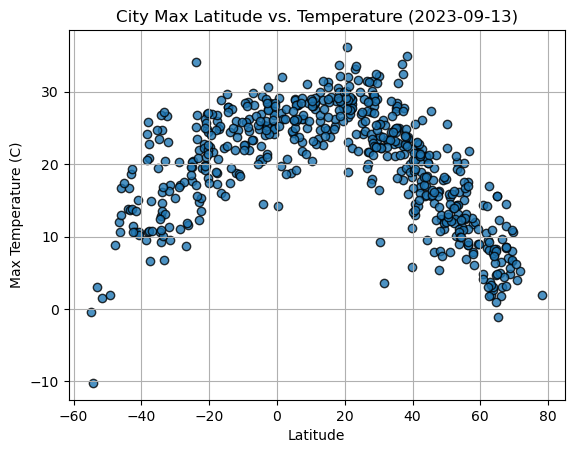

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], 
            city_data_df["Max Temp"], 
            marker="o",
            edgecolor="black",
            linewidths=1,
            label="cities",
            alpha=0.8
)

# Incorporate the other graph properties
import time
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

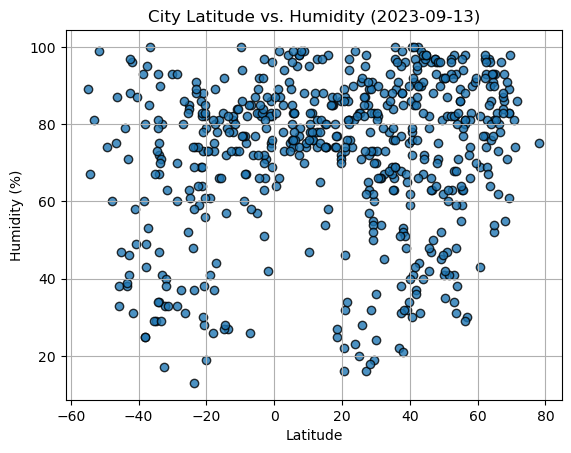

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"], 
            marker="o",
            edgecolor="black",
            linewidths=1,
            label="cities",
            alpha=0.8
)

# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

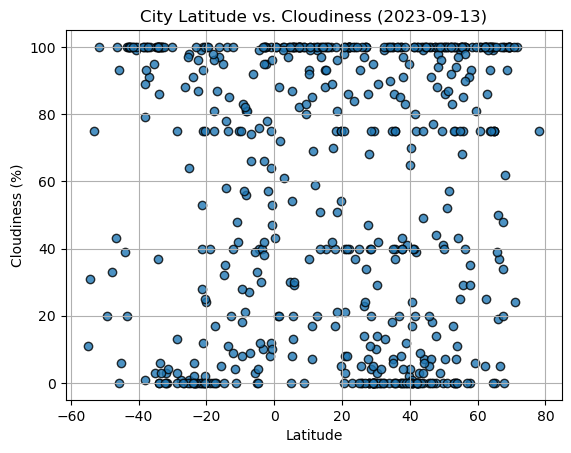

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"], 
            marker="o",
            edgecolor="black",
            linewidths=1,
            label="cities",
            alpha=0.8
)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

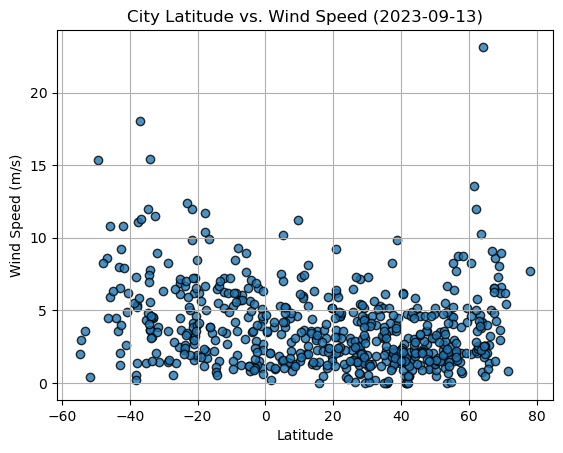

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"], 
            marker="o",
            edgecolor="black",
            linewidths=1,
            label="cities",
            alpha=0.8
)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, title, text_coord):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    
    plt.xlabel("Latitude")
    plt.ylabel(title)

    plt.annotate(line_eq, text_coord, fontsize=15, color="red")
    print(f"The r-value is: {rvalue**2}")
    
    plt.show()


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,badger,64.8000,-147.5333,15.55,52,75,2.57,US,1694653987
1,kingston,17.9970,-76.7936,30.53,74,40,3.09,JM,1694653976
4,korla,41.7597,86.1469,21.66,37,39,4.77,CN,1694653988
7,ribeira grande,38.5167,-28.7000,23.76,96,83,4.02,PT,1694653988
8,constantia,44.1833,28.6500,18.38,72,7,5.85,RO,1694653989


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,grytviken,-54.2811,-36.5092,-10.21,67,31,2.94,GS,1694653987
3,puerto natales,-51.7236,-72.4875,1.53,99,100,0.42,CL,1694653988
5,edinburgh of the seven seas,-37.0676,-12.3116,14.85,85,91,18.04,SH,1694653988
6,taro,-8.3862,115.2800,22.00,75,81,1.89,ID,1694653988
9,blackmans bay,-43.0167,147.3167,18.62,71,100,2.07,AU,1694653989


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6389256103297158


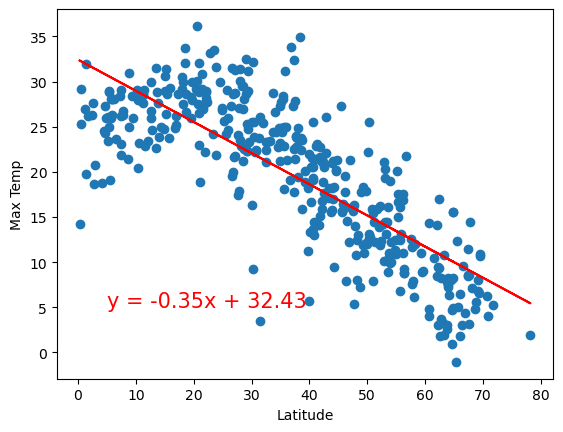

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "Max Temp", (5,5))

The r-value is: 0.5167343054755515


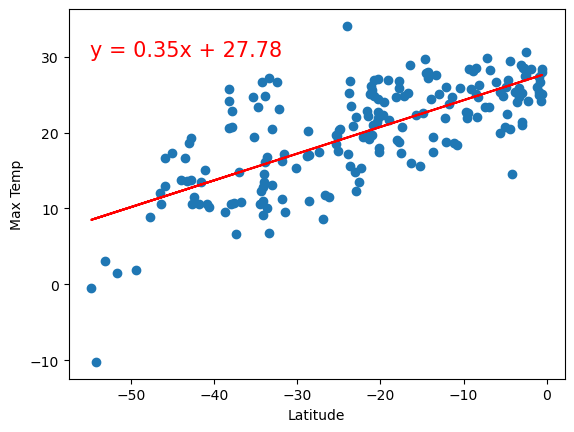

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "Max Temp", (-55,30))

**Discussion about the linear relationship:** The r-value calculated for the northern and southern hemisphere max temperature vs. latitude are greater than 0.5, which is a strong correlation between the two variables. The closer the latitude corrdinates are to 0 degrees, which is the equator, the greater the temperature is in that city compared to those further from the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 8.179728973472568e-05


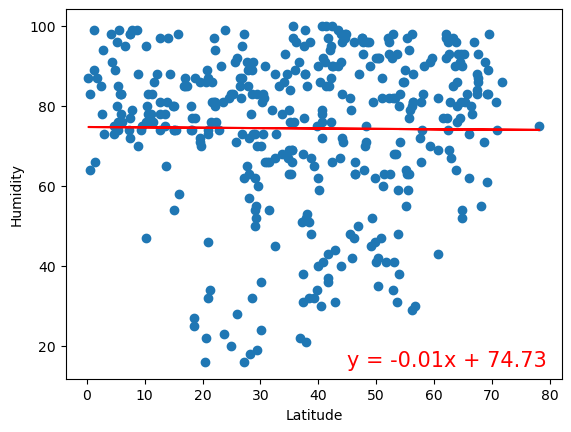

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "Humidity", (45,15))

The r-value is: 0.05244208331952295


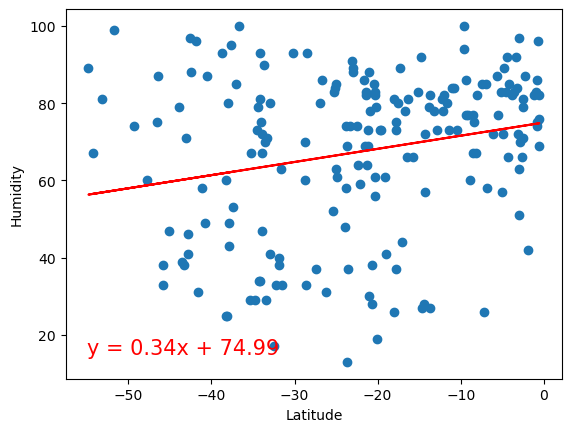

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "Humidity", (-55,15))

**Discussion about the linear relationship:** The r-value calculated for the northern and southern hemisphere humidity vs. latitude were less than 0.1, which is a weak correlation between the two variables. Therefore, humidity is about the same across the cities within the northern hemisphere regardless of the latitude value. The same goes for the cities in the southern hemisphere.

The humidity for majority of the cities within the northern hemispheres is around 80 -100%. The humidity for the cities in the southern hemisphere is about evenly distributed with majority of the cities with humidity of about 60 - 90%.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.00033436872460738053


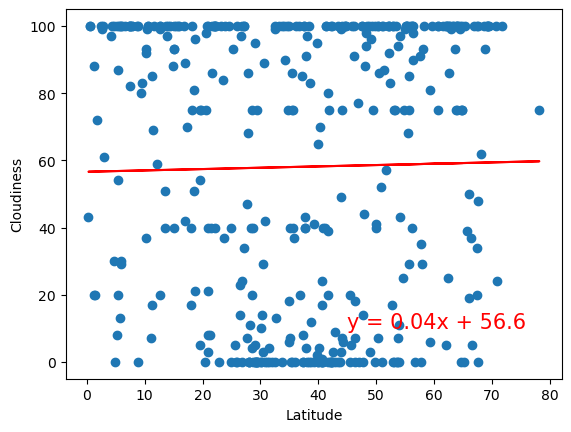

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "Cloudiness", (45,10))

The r-value is: 0.015069271832254228


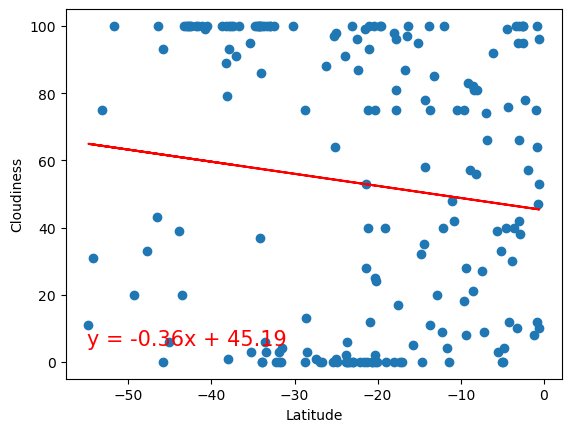

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "Cloudiness", (-55,5))

**Discussion about the linear relationship:** The r-value calculated for the northern and southern hemisphere cloudiness vs. latitude were less than 0.1, which is a weak correlation between the two variables. Therefore, cloudiness is about the same across the cities within the northern hemisphere regardless of the latitude value. The same goes for the cities in the southern hemisphere.

The cloudiness in the cities within both hemispheres are about evenly distributed on a scale of 0 - 100%.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.008884959231309159


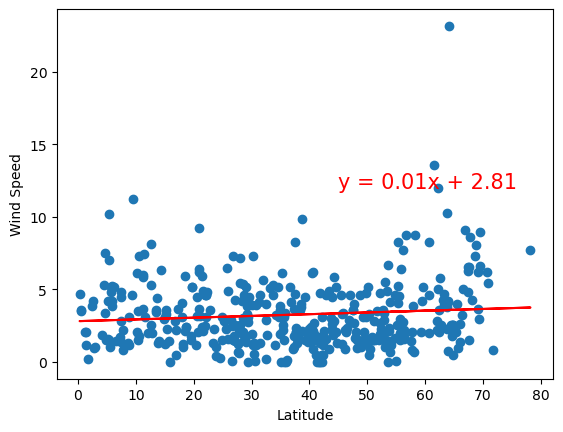

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, "Wind Speed", (45,12))

The r-value is: 0.04506005718203312


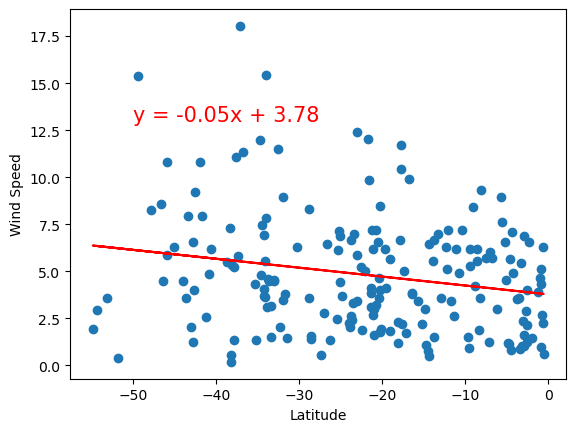

In [22]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, "Wind Speed", (-50,13))

**Discussion about the linear relationship:** The r-value calculated for the northern and southern hemisphere wind speed vs. latitude were less than 0.1, which is a weak correlation between the two variables. Therefore, wind speed is about the same across the cities within the northern hemisphere regardless of the latitude value. The same goes for the cities in the southern hemisphere.

The wind speed in majority of the cities within both hemispheres is about 0 - 7 m/s.